<a href="https://colab.research.google.com/github/Sonali749/MSC-Project/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
import datetime as dt
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [4]:
dataset = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')


In [5]:
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-03-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-03-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
dataset.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
dataset.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,Month,Month_int
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.546816,5.546816
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.857627,2.857627
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000,10.000000


In [ ]:
dataset.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
dataset.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']


In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'],dayfirst=True)

In [ ]:
dataset['Frequency']= dataset['Frequency'].astype('category')


In [ ]:
dataset['Month'] =  dataset['Date'].dt.month


In [ ]:
dataset['Month_int'] = dataset['Month'].apply(lambda x : int(x))

In [ ]:
dataset['Month_name'] =  dataset['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
dataset['Region'] = dataset['Region'].astype('category')

In [ ]:
dataset.drop(columns='Month',inplace=True)
dataset.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-03-31,M,5.48,16635535,41.02,South,15.9129,79.74,3,Mar
1,Andhra Pradesh,2020-03-29,M,5.83,16545652,40.90,South,15.9129,79.74,3,Mar
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


In [ ]:
dataset_stats = dataset[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]


In [ ]:
round(dataset_stats.describe().T,2)


,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [ ]:
region_stats = dataset.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()

In [ ]:
region_stats = round(region_stats,2)

In [ ]:
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


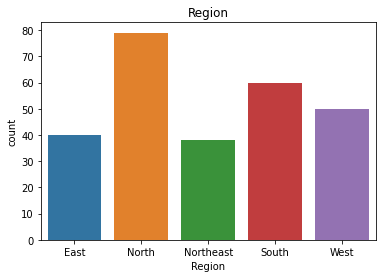

In [ ]:
sns.countplot(x='Region',data=dataset)

plt.title("Region")

plt.show()